**Legal blurb:**  
The modules `crater.py` and `blasts.py` are published under the Gnu General public licence version 2

# Remarks

The code tries to roughly separate the geometric functionality from the capabilities to handle blast history, and energy related problems. To compute blast properties, the following information is necessary:

- A crossectional elevation profile of a crater
- The blast energy
- The location of the blast energy
- optional: some information about the pre-blast topography (as profile data)

With this information 3 different objects are created for each blast:

- A `Profile` object  
  Provides generic geometry information such as e.g. depth, as well as some functionality for volume calculation.
  There are several profile types: A `CirularProfile` (Assumes circular symmetry for volume and radius calculations), an
  `EllipticProfile` which is a compound profile made from two `CircularProfile`s, and assumes that those have a 90 degrees
  angle (assumes elliptic symmetry). There is also a `DEM` in development (not included here) that will represent a 3d
  model of a crater.
- A `Crater` object  
  Provides specific crater geometry, such as radius, volume, depth. A `Crater` object needs a `Profile` object as input
  (see below).
- A `Blast` object  
  Here the geometry information is merged with energy and blast history. The `Blast` object does not necessarily need a
  `Crater` as input. In such a case, a crater radius and volume can be specified manually. A `Blast` can have another
  `Blast` as 'parent', in which case some cumulative properties (e.g. energy) are available for analysis, which is
  necessary to clearly distnguish between one-blast and multi-blast structures.

More features can be found in the script code in the files `crater.py` and `blasts.py`.

*Note that the code does not include any unit conversions. It should, in principle work fine with imperial or any other unit system, but this is untested. The examples below use SI units*.

  
  
This line loads the plotting backend. If is does not work try to comment out line 1 and uncomment line 2.

In [1]:
%matplotlib notebook
#%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

**import the `crater` module and `Blast` object** and some other stuff

In [2]:
import crater
from blasts import (Blast,    # the Blast object
                    ot,       # one third
                    kgplb,    # unit conversion
                    spec_en)  # specific energy of PETN (J/kg)

print(" ot      = %s\n" % ot,
      "kgplb   = %s\n"  % kgplb,
      "spec_en = %s"    % spec_en)

 ot      = 0.3333333333333333
 kgplb   = 0.45359237
 spec_en = 4850000.0


## load profile data from text file

Import the numpy library (only used here to read the text files).

In [3]:
import numpy as np

Read the text files into arrays. Data is given as $(x,y)$-pairs, where $x$ is a horizontal and $y$ a vertical coordinate. Have a look at the the text files in the `data` directory. Location units are meters.

In [4]:
data41 = np.loadtxt('data/2014-crater-profiles_p4b1.txt',
                    skiprows=1)
data42 = np.loadtxt('data/2014-crater-profiles_p4b2.txt',
                    skiprows=1)

# `Crater` object

## create profile objects

In [5]:
p41 = crater.CircularProfile(data=(data41[:, 0], data41[:, 1]))
p42 = crater.CircularProfile(data=(data42[:, 0], data42[:, 1]))

## create crater objects from profiles

In [6]:
c41 = crater.Crater(profile=p41)
c42 = crater.Crater(profile=p42)

Show some crater information. The `fignum` argument is only necessary to distinguish between different plots.

depth:                       0.3917
max rim height difference:   0.0071
min volume:                  0.2461
max volume:                  0.2571
volume:                      0.2516 +- 0.0116
rel. deviation:              4.62 %



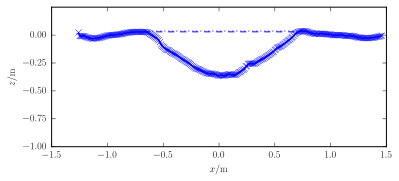

In [7]:
c41.show(fignum=410)

# `Blast` object

In [8]:
b41 = Blast(4, 1, parent=None, energy=ot * spec_en * kgplb,
            dob=.46, desc="session 2014", crater=c41)
b42 = Blast(4, 2, parent=b41, energy=ot * spec_en * kgplb,
            dob=.5, desc="session 2014", crater=c42)

pad 4, blast 2, parent: Blast(session 2014, pad=4, run=1)
energy this blasts, cumulative: 733307.6648, 1466615.3297
dob: 0.500000

effective depth: 0.467243817281
volume, created volume: 0.312236369682, 0.060635792772
radius, radius change: 0.728602291, 0.024321015

depth:                       0.4261
max rim height difference:   0.0051
min volume:                  0.3078
max volume:                  0.3167
volume:                      0.3122 +- 0.0082
rel. deviation:              2.62 %



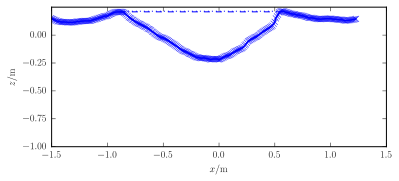

In [9]:
b42.show(fignum=421)

### control volume

In [10]:
b41.control_vol

1.5424476935997911

In [11]:
b42.control_vol

1.5143835279814222

### radius

Crater radius, and change of crater radius

In [12]:
b41.radius, b42.radius

(0.70428127600000001, 0.72860229100000007)

In [13]:
b42.radius_change

0.024321015000000057

### energy

Energy of a particular blast, and cumulative energy of a blast and its preceding blasts (parents).

In [14]:
b41.energy, b42.energy

(733307.6648333333, 733307.6648333333)

In [15]:
b42.energy_cumul

1466615.3296666667

### volume

total crater volume, and volume change caused by the blast

In [16]:
b41.volume, b42.volume

(0.25160057690952303, 0.31223636968154378)

In [17]:
b42.created_volume

0.060635792772020747

### confinement potential $U$


Confinement potential $U$, and confinement potential in flat topography $U_0$.

In [18]:
b41.u, b41.u0

(0.70952593905590389, 0.70952593905590389)

In [19]:
b42.u, b42.u0

(0.64941409073499212, 0.90982818491749107)

### average confinement force $F$

Average confinement force $F$, and average confinement force in flat topography $F_0$.

In [20]:
b41.f, b41.f0

(1.5424476935997911, 1.5424476935997911)

In [21]:
b42.f, b42.f0

(1.389882683763596, 1.5346684404444479)

### (effective) explosion depth

Distance of charge location to pre-blast crater bottom $d$, and effective explosion depth below crater bottom $d_{eff}$.

In [22]:
b41.dob, b41.deff

(0.46, 0.46)

In [23]:
b42.dob, b42.deff

(0.5, 0.46724381728138031)